<a href="https://colab.research.google.com/github/miguelamda/DL/blob/master/3.%20Frameworks%20Software/Practica3.1.%20Introduccion%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/miguelamda/DL/blob/master/3.%20Frameworks%20Software/imgs/tensorflow_head.png?raw=1" />

# Práctica 3.1. Introducción a TensorFlow (sin Keras)

**TensorFlow** (https://www.tensorflow.org/, a veces llamado simplemente *TF*) es una librería de software desarrollada por Google Brain con el propósito de realizar investigación en Machine Learning y Deep Neural Networks. Esta librería provee un entorno para *diferenciación automática*, siendo por tanto potente para implementación de algoritmos basados en propagación de gradientes. Esta plataforma fue introducida en 2015, por lo que ha pasado un proceso de maduración intensivo. De hecho, hay un gran cambio sustancial en la API en el paso de la versión 1 y la versión 2, por lo que es posible que muchos códigos viejos no funcionen. Para dar retrocompatibilidad, TensorFlow provee el módulo ``tf.compat.v1``. Si lanzamos el código en Google Colab, también es posible hacer uso de la versión 1.0 de TensorFlow con el siguiente comando mágico (se debe colocar justo antes de cargar la librería tensorflow):


```
%tensorflow_version 1.x
```

Por otro lado, **Keras** es una API de abstracción de alto nivel basada en TensorFlow. Desde la versión 2 de TF, Keras es parte de la API y es lo más usado para crear redes neuronales. En resumen, la nueva versión TensorFlow 2.0 se basa en las siguientes ideas:

- Permitir a los usuario lanzar la computación de forma estricta (eager computation, es decir, como en cualquier lenguaje de programación imperativo). Esto hace que sea más intuitivo ya que se asemeja a Numpy.
- Preserva las ventajas considerable de compilar grafos (para rendimiento, distribución y desplegado). Esto hace que TensorFlow sea rápido, escalable y listo para producción.
- Usa Keras como API de algo nivel para Deep Learning, haciendo que TensorFlow sea sencill y altamente productivo.
- Extiende Kears a un espectro de workflows desde el más alto nivel (más fácil de usar, menos flexible) al más bajo nivel (para expertos, pero con gran flexibilidad).

Por tanto, antes de pasar a centrarnos en Keras, es interesante tener una pequeña idea de qué sucede "detrás de las cámaras" en TensorFlow de más bajo nivel. De esta forma también seremos capaces de entener los tipos de datos que se emplean (*tensores*). 

## 1. Principales características de Tensorflow

Se puede resumir las siguientes características de TensorFlow:

* Definir, optimizar, y calcular de forma eficiente expresiones matemáticas que involucran arrays multidimensionales (**tensores**).

* Soporte para la programación de ML y Deep Neural Networks.

* Uso transparente de computación con GPU y TPU, proporcionando gestión automática y optimización de la memoria y de los datos usados. Se puede ejecutar el mismo código en CPUs o GPUs. Más específicamente, TF decide qué partes de la computación deben ser trasladadas a la GPU.

* Alta escalabilidad de la computación tanto a nivel de máquina como de conjuntos de datos.

TensorFlow está disponible para uso directo desde Python y C++, aunque la API para Python está mejor documentada y es más sencilla.

## 2. Un ejemplo preliminar

In [1]:
# Un ejemplo de cálculo en Python
x = 1
y = x + 10
print(y)

11


In [2]:
# Previamente, tensorflow debe estar instalado: pip install tensorflow (requiere python en 64 bits)
import tensorflow as tf

In [3]:
# El "mismo" cálculo en TF
x = tf.constant(1, name='x')
y = tf.Variable(x+10, name='y')
print(y)

<tf.Variable 'y:0' shape=() dtype=int32, numpy=11>


Puedes ver que las variables en TF son objetos más abstractos. Estos son conocidos simplemente como *tensores*. Un tensor se puede convertir fácilmente a un Numpy array con la llamada ``.numpy()``.

In [7]:
print(x.numpy())

print(y.numpy())

1
11


Como en los Numpy array, los tensores también tienen los atributos dtype y shape.

In [9]:
print('dtype:', x.dtype)
print('shape:', x.shape)

dtype: <dtype: 'int32'>
shape: ()
dtype: <dtype: 'int32'>
shape: ()


## 3. Tipos de Datos (Tensores)

Veamos con más detenimiento el concepto de tensor. Un tensor es un contenedor de datos, usualmente números. Por ejemplo, una matriz es un tensor de 2 dimensiones. Los tensores son generalizaciones de las matrices a un número arbitrario de dimensiones (el nombre de tensor viene en realidad de la física). En el contexto de tensores, una dimensión se denomina eje (axis).

Un tensor se define por 3 atributos principales:
* Número de ejes (rank). Por ejemplo, una matriz o tensor 2D itene 2 ejes.
* Forma (shape). Una tupla de enteros que describen cuantas dimensiones tiene el tensor en cada eje. Un escalar tiene un shape igual a (). Una matriz de 3x4 tiene un shape (3, 4).
* Tipo de dato (dtype). Es el tipo de dato contenido en el tensor, por ejemplo `float32`, `uint8`, `float64`, etc. Normalmente no hay tensores de cadenas de texto, ya que los tensores viven en segmentos de memoria pre-reservados y contiguos.

### Tensores 0D (Escalares)

In [13]:
x = tf.constant(4, name='x')
print(x)

tf.Tensor(4, shape=(), dtype=int32)


### Tensores 1D (Vectores)

In [14]:
x = tf.constant([1, 4, 2, 3])
print(x)

tf.Tensor([1 4 2 3], shape=(4,), dtype=int32)


### Tensores 2D (Matrices)

In [16]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

x.numpy()

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


array([[5, 2],
       [1, 3]], dtype=int32)

### Formas de inicializar tensores
Algunas formas usuales de inicializar tensores es con funciones como ``tf.ones`` y ``tf.zeros``, que son parecidas a las que hay en Numpy.

In [17]:
print(tf.ones(shape=(2, 1)))  # parecido a np.ones
print(tf.zeros(shape=(2, 1))) # parecido a np.zeros

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


También, y lo más usual, se pueden inicializar tensores de forma aleatoria.

In [18]:
# Creando un tensor de dimensiones (2,2) y usando una distribución uniforme de enteros entre 0 y 10

tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6, 8],
       [9, 0]], dtype=int32)>

In [19]:
# Creando un tensor de dimensiones (2,2) y usando una distribución normal (media 0 y desviación 1)

tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.0966113 ,  1.0678525 ],
       [-0.12178493, -2.4440207 ]], dtype=float32)>

### Variables

Las variables son un tipo de tensor especial cuyo estado es mutable (como los pesos de una red neuronal). Se pueden crear variables a partir de un valor inicial.

In [36]:
valor_inicial = tf.random.normal(shape=(2, 2))
a = tf.Variable(valor_inicial)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.9341961 , -0.67727065],
       [-1.3522539 ,  0.9269897 ]], dtype=float32)>


Se puede actualizar el valor de una variable usando los métodos `.assign(valor)`, o `.assign_add(incremento)` o `.assign_sub(decremento)`:

In [39]:
nuevo_valor = tf.random.normal(shape=(2, 2))

a.assign(nuevo_valor) # reemplaza el valor por otro

print (a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.0017436 ,  0.00630436],
       [-2.5787752 ,  0.0756517 ]], dtype=float32)>


In [40]:
added_value = tf.ones(shape=(2, 2))

a.assign_add(added_value)  # sumemos 1 a todos los valores en la variable

print (a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.00174356,  1.0063044 ],
       [-1.5787752 ,  1.0756516 ]], dtype=float32)>


### Operaciones Básicas (Con Ejemplos)

In [21]:
import numpy as np
# Creación de matrices con numpy
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='float32') 
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='float32')

In [23]:
# Inicialización de constantes desde arrays numpy
tf_mat1 = tf.constant(matrix1) 
tf_mat2 = tf.constant(matrix2)

In [33]:
# Multiplicación de matrices
matrix_product = tf.matmul(tf_mat1, tf_mat2)
print ('producto:\n', matrix_product.numpy())
# Suma de matrices
matrix_sum = tf.add(tf_mat1, tf_mat2)
print ('suma:\n', matrix_sum.numpy())

producto:
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
suma:
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [35]:
# Determinante de una matriz
matrix_det = tf.linalg.det(matrix_sum)
print ('determinante:\n', matrix_det.numpy())

determinante:
 0.0


In [62]:
# También podemos usar TensorFlow como usaríamos Numpy. La diferencia es que TF puede lanzarse en GPUs y en TPUs
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)
print(e)

tf.Tensor(
[[8.079205  1.0011758]
 [2.5328631 1.2404824]], shape=(2, 2), dtype=float32)


### Manipulando Tensores

Vamos a ver algunas operaciones que se pueden realizar con TensorFlow utilizando una imagen, como el logo de Keras.

In [41]:
# Requiere tener instalados matplotlib y pillow
%matplotlib inline

In [50]:
import matplotlib.image as mp_image
filename = "imgs/keras-logo-small.jpg"   # descarga previamente esta imagen
input_image = mp_image.imread(filename)

In [43]:
#dimension
print('input dim = {}'.format(input_image.ndim))
#shape
print('input shape = {}'.format(input_image.shape))

input dim = 3
input shape = (300, 300, 3)


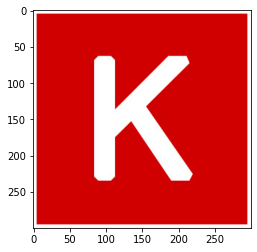

In [44]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

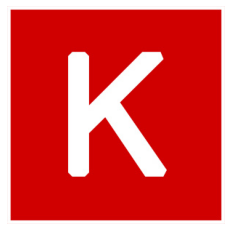

In [57]:
# Los ejes los pone matplotlib, podemos quitarlos de la siguiente forma
plt.axis('off')
plt.imshow(input_image)
plt.show()

#### Recorte (Slicing)

Hemos visto que hemos cargado una imagen de 300x300 con 3 canales (RGB) en un numpy array, gracias a matplotlib.

Podemos convertir en numpy array a un tensor de las mismas dimensiones: (300,300,3). Una vez lo tengamos, con la función slice de TF podemos quedarnos con una parte del tensor, según le digamos en cada dimensión.

In [58]:
# convertimos a tensor
my_image = tf.constant(input_image,dtype='uint8')

# obtenemos un recorte en la primera dimensión, desde la posición 100, tomando 16
# elementos. El resto de dimensiones no se recortan (-1 es para incluir todo)
slice = tf.slice(my_image,begin=[100,0,0],size=[16,-1,-1]) 
slice.shape

TensorShape([16, 300, 3])

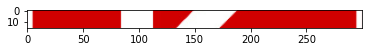

In [60]:
plt.imshow(slice)  # la conversión a numpy también es automática desde un tensor
plt.show()  # veamos qué hemos recortado

#### Transponer (Transpose)

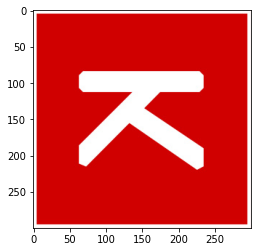

In [61]:
# acabamos de cambiar la primera dimensión por la segunda y viceversa
transp = tf.transpose(my_image, perm=[1,0,2]) # perm indica como se permutan las dimensiones

plt.imshow(transp)
plt.show()

## 4. Grafo de Flujo de Datos

Como hemos visto en los temas de teoría, una red neuronal se puede representar mediante un grafo de computación, o un **Grafo de Flujo de Datos**.

Un **Grafo de Flujo de Datos** es un grafo donde:
  * cada Nodo representa la *instancia* de una operación matemática básica: *multiplicar*, *sumar*, *dividir*
  * cada Arista es un dato multi-dimensional (`tensor`) sobre el que se ejecuta la operación.

<img src="https://github.com/miguelamda/DL/blob/master/3.%20Frameworks%20Software/imgs/dfg.gif?raw=1" />

### Modelo de Grafo de Tensorflow

Estos son lso elementos de los grafos de computación de TensorFlow. En la versión 1, el grafo era estático y requería lanzar sesiones sobre él para obtener resultados. A partir de la versión 2, los grafos son dinámicas y se pueden obtener los resultados directamente (eager computation).

* **Nodo**: En TensorFlow cada nodo representa la instanciación de una operación. 
    - Cada operación tiene entradas (`>= 2`) y salidas `>= 0`.
    
* **Aristas**: En TensorFlow hay dos tipos de aristas:
    - **Aristas de Datos**: son transportadores de estructuras de datos (`tensores`), donde una salida de una operación (que sale de un nodo) se convierte en la entrada de otra operación.
    - **Aristas de dependencia**: indican un *dependencia* entre dos nodos (es decir, una relación del tipo "sucede antes"). 
        + Si `A` y `B` son nodos y hay una dependencia de `A` a `B`, entonces `B` comenzará su operación solo cuando la de `A` haya acabado. 
        
* **Operación**: representa una computación abstracta, como sumar o multiplicar matrices. Manipula tensores, y puede ser polimórfica, es decir, puede manipular tensores de distinto tipo. 
  + Por ejemplo, la suma de dos tensores int32, la suma de dos tensores float, etc.

* **Kernel**: representa la implementación concreta de una operación. 
  + Por ejemplo, una operación `add matrix` puede tener una implementación CPU y otra GPU.

### Cálculo de gradientes

Con TF se pueden calcular los gradientes de forma automática de cualquier expresión que sea diferenciable (como hemos visto en temas anteriores).

Se puede hacer de forma manual con [`GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape). Primero comenzamos a vigilar ("watching") un tensor con `tape.watch()`, y posteriormente componemos una expresión diferenciable usando este tensor como entrada. Por ejemplo:

In [63]:
a = tf.random.normal(shape=(2, 2))  # un tensor aleatorio, `a` (será la entrada, es decir, vamos a diferenciar respecto de `a`)
b = tf.random.normal(shape=(2, 2))  # un tensor aleatorio, `b` 

with tf.GradientTape() as tape:     # donde ponemos tape, decimos tf.GradientTape()
  tape.watch(a)  # Indicamos que queremos guardar la historia de operaciones aplicados a `a`
  c = tf.sqrt(tf.square(a) + tf.square(b))  # Hacemos algo de matemáticas usando `a`
  # Finalmente, si queremos saber el gradiente de `c` con respecto a `a`, usamos
  dc_da = tape.gradient(c, a) # este es el gradiente (derivada) de `c` respecto de `a`
  print(dc_da)

tf.Tensor(
[[-0.79998416  0.2532157 ]
 [-0.97626734  0.04038463]], shape=(2, 2), dtype=float32)


Sin embargo, por defecto todas las variables son vigiladas ("watched") automáticamente, por lo que no necesitamos hacer un `watch` sobre ellas. El ejemplo anterior, si convertimos a `a` en una variable, quedaría tan simple como:

In [64]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  # no es necesario hacer un watch sobre a, aunque necesitamos que sea una variable
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[-0.79998416  0.2532157 ]
 [-0.97626734  0.04038463]], shape=(2, 2), dtype=float32)


## 5. Dispositivos de Computación

En un sistema habitual hay múltiples dispositivos de computación:
* El procesador del sistema, o CPU. Suelen tener varios núcleos de computación (del orden de 2 a 16). Se les denomina procesadores multicore.
* El procesador gráfico, o GPU. Suelen tener de cientos a miles de núcleos de computación (pero son menos "potentes" que los núcleos de una CPU). Se les denomina procesadores manycore.
* Procesador específico para tensores, o TPU. Es un hardware que se vende aparte y es específico para Deep Learning y tareas con tensores.

TF soporta **CPU**, **GPU**, y **TPU**. Vienen representados como cadenas, por ejemplo:

* `"/cpu:0"`: La CPU de tu máquina.
* `"/gpu:0"`: La GPU de tu máquina, si tienes una.
* `"/gpu:1"`: Una segunda GPU.

Si una operación TF tiene implementaciones para **CPU** y **GPU**, los dispositivos GPU tendrán prioridad en la asignación de tareas. Por ejemplo, `matmul` tiene ambas implementaciones, por lo que en un sistema con dispositivos `cpu:0` y `gpu:0`, `gpu:0` será el seleccionado para ejecutar `matmul`.

### Un ejemplo ejecutado en una máquina con una Tesla T4

Si estás en Google Colab u otro entorno en la nube, o bien tienes instalado el ecosistema de CUDA en tu equipo (con las variables PATH correctas), puedes preguntar qué GPUs tienes en el sistema con:

In [4]:
!nvidia-smi

Thu Nov 26 13:13:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |    289MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Vemos que tenemos una T4 (esto se cambiará a tu GPU, si la tienes, cuando evalúes la celda anterior). Por defecto siempre se usará la GPU con número 0, pero puedes restringir qué GPU usar cambiando la variable de entorno `CUDA_VISIBLE_DEVICES` (puedes elegir más de una poniendo sus identificadores separados por comas). Más adelante veremos en otra práctica cómo hacerlo.

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # selecciona la primera GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"  # selecciona la segunda GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1,2"  # selecciona la segunda y tercera GPU

# dejemos nuestra selección en la primera GPU
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

Si quieres que una operación en particular se ejecute en un dispositivo concreto en lugar de lo que se selecciona automáticamente, puedes usar `tf.device` para crear un contexto de dispositivo, y todas las operaciones dentro de ese contexto se ejecutarán en el mismo dispositivo designado. Por ejemplo, a continuación forzamos a crear unos tensores en CPU. Veamos cómo existe una transferencia a GPU una vez salgamos el contexto de CPU:

In [3]:
# Obtenemos mensajes de log con log_device_placement igual a True.
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


### Un ejemplo ejecutado en una máquina con dos GeForce GTX 760

A continuación se muestra un código que carga un tensor en una GPU distinta, y finalmente realiza la operación en la CPU. No se pone como celda de código porque vamos a asumir que estamos en Google Colab, pero si tienes un equipo con varias GPUs, o una instancia de por ejemplo AWS con varias GPUs, puedes probar a copiar y pegar lo siguiente en una celda de código. La salida es posible que cambie ya que fue ejecutado con TensorFlow 1.

```python
# Obtenemos mensajes de log con log_device_placement igual a True.
tf.debugging.set_log_device_placement(True)

# Crea un grafo
c = []
for d in ['/gpu:0', '/gpu:1']:
  with tf.device(d):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
    c.append(tf.matmul(a, b))
with tf.device('/cpu:0'):
  sum = tf.add_n(c)

print (sum)
```

```
Device mapping:
/job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GTX 760, pci bus
id: 0000:02:00.0
/job:localhost/replica:0/task:0/gpu:1 -> device: 1, name: GeForce GTX 760, pci bus
id: 0000:03:00.0
Const_3: /job:localhost/replica:0/task:0/gpu:0
Const_2: /job:localhost/replica:0/task:0/gpu:0
MatMul_1: /job:localhost/replica:0/task:0/gpu:0
Const_1: /job:localhost/replica:0/task:0/gpu:1
Const: /job:localhost/replica:0/task:0/gpu:1
MatMul: /job:localhost/replica:0/task:0/gpu:1
AddN: /job:localhost/replica:0/task:0/cpu:0
[[  44.   56.]
 [  98.  128.]]
```

En resumen, con TensorFlow [podemos](https://www.tensorflow.org/guide/gpu):

* Usar una sola GPU de un sistema multiGPU
* Usar varias o todas las GPUs de un sistema multiGPU
* Forzar a cambiar de dispositivo a nuestro antojo con `tf.device`
* Restringir la cantidad de memoria reservada en GPU

Puedes ver una introducción más exhaustiva en este [tutorial de F. Chollet sobre TensorFlow 2](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO#scrollTo=Owbx4mlEErNN), el cual ha sido usado para dar el salto de versión en esta primera práctica.